# Logistic Regression

In [1]:
# For each model we observe the model’s prediction that an Iris is/isn’t a Virginica

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

import matplotlib
import matplotlib.pyplot as plt


iris = datasets.load_iris()

print(list(iris.keys()))
# print(iris["data"])
# print(iris["target"])
print(iris["DESCR"])

X = iris["data"][:,3:]  # petal width
y = (iris["target"]==2).astype(np.int)

log_reg = LogisticRegression(penalty="l2")
log_reg.fit(X,y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X,y,"b.")
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginca")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

log_reg.predict([[1.7],[1.5]])

iris = datasets.load_iris()

X = iris["data"][:,(2,3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=5)
softmax_reg.fit(X,y)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print(Z)

plt.figure(1, figsize=(6,4))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.figure(1, figsize=(4, 3))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b.", label="Iris-Setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "y.", label="Iris-Versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "r.", label="Iris-Virginica")
plt.legend(loc="upper left", fontsize=14)

plt.show()

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76 

C:\Users\soria\Anaconda3\envs\Practice\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<Figure size 640x480 with 1 Axes>

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


<Figure size 600x400 with 1 Axes>

# Support Vector Machines

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76 

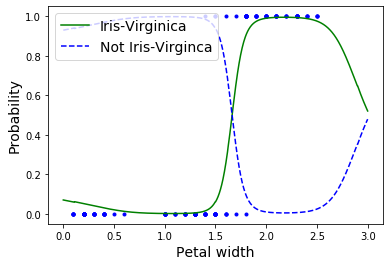

[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


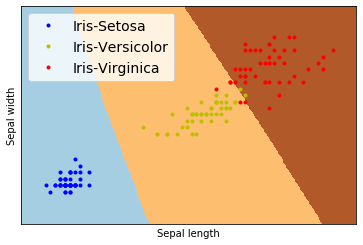

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

import matplotlib
import matplotlib.pyplot as plt


iris = datasets.load_iris()

print(list(iris.keys()))
# print(iris["data"])
# print(iris["target"])
print(iris["DESCR"])

X = iris["data"][:,3:]  # petal width
y = (iris["target"]==2).astype(np.int)

clf = svm.SVC(gamma='scale', decision_function_shape='ovo', probability=True)  # added probability=True
clf.fit(X,y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = clf.predict_proba(X_new)

plt.plot(X,y,"b.")
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginca")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

clf.predict([[1.7],[1.5]])

iris = datasets.load_iris()

X = iris["data"][:,(2,3)]  # petal length, petal width
y = iris["target"]

clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(X,y)


x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print(Z)


plt.figure(1, figsize=(6,4))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.figure(1, figsize=(4, 3))
#plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b.", label="Iris-Setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "y.", label="Iris-Versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "r.", label="Iris-Virginica")
plt.legend(loc="upper left", fontsize=14)

plt.show()

# Naive Bayes (guassian model)

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76 

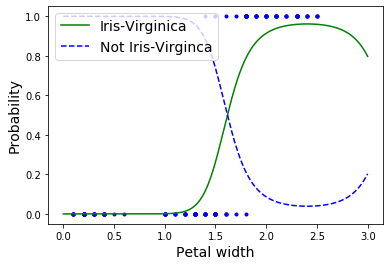

[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


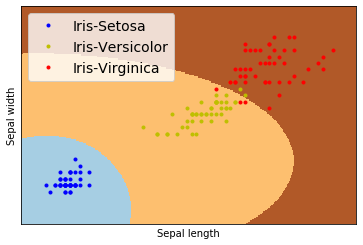

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, ComplementNB, GaussianNB

import matplotlib
import matplotlib.pyplot as plt


iris = datasets.load_iris()

print(list(iris.keys()))
# print(iris["data"])
# print(iris["target"])
print(iris["DESCR"])

X = iris["data"][:,3:]  # petal width
y = (iris["target"]==2).astype(np.int)

clf = GaussianNB()
clf.fit(X,y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = clf.predict_proba(X_new)

plt.plot(X,y,"b.")
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginca")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

clf.predict([[1.7],[1.5]])

iris = datasets.load_iris()

X = iris["data"][:,(2,3)]  # petal length, petal width
y = iris["target"]

clf = GaussianNB()
clf.fit(X,y)


x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print(Z)


plt.figure(1, figsize=(6,4))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.figure(1, figsize=(4, 3))
#plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b.", label="Iris-Setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "y.", label="Iris-Versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "r.", label="Iris-Virginica")
plt.legend(loc="upper left", fontsize=14)

plt.show()

# Random Forest

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76 

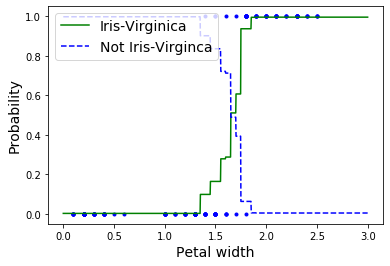

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


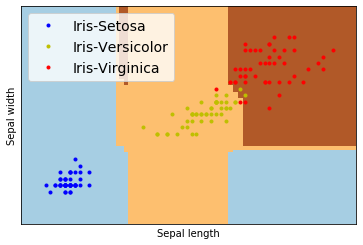

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

import matplotlib
import matplotlib.pyplot as plt


iris = datasets.load_iris()

print(list(iris.keys()))
# print(iris["data"])
# print(iris["target"])
print(iris["DESCR"])

X = iris["data"][:,3:]  # petal width
y = (iris["target"]==2).astype(np.int)

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X,y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = clf.predict_proba(X_new)

plt.plot(X,y,"b.")
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginca")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

clf.predict([[1.7],[1.5]])

iris = datasets.load_iris()

X = iris["data"][:,(2,3)]  # petal length, petal width
y = iris["target"]

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X,y)


x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print(Z)


plt.figure(1, figsize=(6,4))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.figure(1, figsize=(4, 3))
#plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b.", label="Iris-Setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "y.", label="Iris-Versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "r.", label="Iris-Virginica")
plt.legend(loc="upper left", fontsize=14)

plt.show()

# AdaBoost

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76 

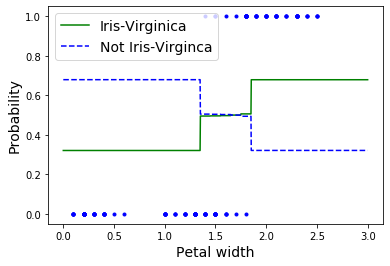

[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


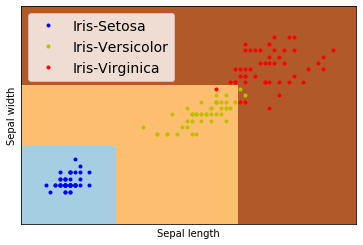

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, ComplementNB, GaussianNB

import matplotlib
import matplotlib.pyplot as plt


iris = datasets.load_iris()

print(list(iris.keys()))
# print(iris["data"])
# print(iris["target"])
print(iris["DESCR"])

X = iris["data"][:,3:]  # petal width
y = (iris["target"]==2).astype(np.int)

clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X,y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = clf.predict_proba(X_new)

plt.plot(X,y,"b.")
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginca")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

clf.predict([[1.7],[1.5]])

iris = datasets.load_iris()

X = iris["data"][:,(2,3)]  # petal length, petal width
y = iris["target"]

clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X,y)


x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print(Z)


plt.figure(1, figsize=(6,4))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.figure(1, figsize=(4, 3))
#plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b.", label="Iris-Setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "y.", label="Iris-Versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "r.", label="Iris-Virginica")
plt.legend(loc="upper left", fontsize=14)

plt.show()
